In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import tensorflow as tf

## 讀入 Tensorflow

In [2]:
%tensorflow_version

UsageError: Line magic function `%tensorflow_version` not found.


## 讀入MNSIT 數據集

In [3]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

### 數據集內容

In [6]:
len(x_train)

60000

In [7]:
len(y_train)

60000

In [8]:
len(x_test)

10000

In [9]:
n = 9487
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[n]

1

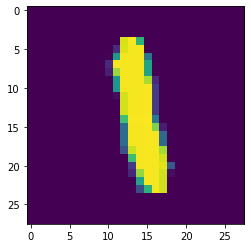

In [11]:
plt.imshow(x_train[n],)

正確答案 1


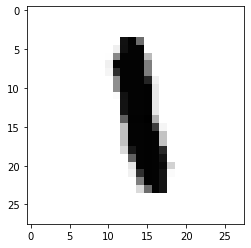

In [12]:
plt.imshow(x_train[n], cmap= 'Greys')
print('正確答案', y_train[n])

## 資料整理

In [13]:
np.array([3,78,95,99])/255

array([0.01176471, 0.30588235, 0.37254902, 0.38823529])

In [14]:
x_train = x_train/255
y_train = y_train/255

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
28*28

784

In [17]:
x_train = x_train.reshape(60000, 784)

In [ ]:
x_test = x_test.reshape(10000, 784)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train, 10)

In [20]:
y_test = to_categorical(y_test, 10)

In [21]:
y_train[9487]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 打造神經網路

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [24]:
model = Sequential()

In [25]:
model.add(Dense(87, input_dim = 784, activation='relu'))

In [26]:
model.add(Dense(87, activation='relu'))

In [27]:
model.add(Dense(10, activation='softmax'))

## 組裝我們的神經網路

In [28]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [22]:
784*87 +87

68295

## 訓練

In [31]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0047 - accuracy: 0.9928
Epoch 2/20
60000/60000 [==============================] - 3s 45us/sample - loss: 1.0142e-04 - accuracy: 1.0000
Epoch 3/20
60000/60000 [==============================] - 3s 46us/sample - loss: 5.4508e-05 - accuracy: 1.0000
Epoch 4/20
60000/60000 [==============================] - 3s 47us/sample - loss: 3.6984e-05 - accuracy: 1.0000
Epoch 5/20
60000/60000 [==============================] - 3s 47us/sample - loss: 2.7819e-05 - accuracy: 1.0000
Epoch 6/20
60000/60000 [==============================] - 3s 45us/sample - loss: 2.2217e-05 - accuracy: 1.0000
Epoch 7/20
60000/60000 [==============================] - 3s 44us/sample - loss: 1.8449e-05 - accuracy: 1.0000
Epoch 8/20
60000/60000 [==============================] - 3s 44us/sample - loss: 1.5746e-05 - accuracy: 1.0000
Epoch 9/20
60000/60000 [==============================] - 3s 44us/sample - loss: 1.3717e-05 -

## 成果

In [34]:
result = model.predict_classes(x_test)

神經網路預測結果 0


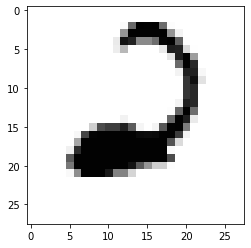

In [35]:
n = 9487
print("神經網路預測結果",result[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')